# (2024) Optimisation
# Abdullah Sharaf 

<h2 style="color:blue;">Implement all the functions f(x) and gi(x); ∀i ∈ [1, 7] independently, where each function takes at least a Numpy array x. Each function should have an independent counter
that represents how many times a respective function has been called (or in other words evaluated).
Problem implementation</h2>

In [27]:
# libriries definations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [28]:
# vairabiles to save times of function calls
f_call_count      = 0
g1_call_count     = 0
g2_call_count     = 0
g3_call_count     = 0
g4_call_count     = 0
g5_call_count     = 0
g6_call_count     = 0
g7_call_count     = 0
gp_call_count     = 0
gdelat_call_count = 0
gef_call_count    = 0
gh_call_count     = 0
gp0_call_count    = 0
gw_call_count     = 0

# Define the decision variables
x = np.array([4.19, 11.57, 6.69, 10.65])

def P(x):
    global gp_call_count
    gp_call_count += 1
    value = ((np.log10(np.log10(8.122 * x[3] + 0.8)) - 10.04) / -3.55)
    return value 
    
def delta_T(x):
    global gdelat_call_count
    gdelat_call_count += 1
    value = 2 * (10**P(x) - 560)
    return value

def Ef(x):
    global gef_call_count
    gef_call_count += 1
    value = 143.308 * delta_T(x) * x[0]
    return value

def h(x):
    global gh_call_count
    gh_call_count += 1
    value = (1500 * np.pi / 60)**2 * (2 * 10**(-6) * np.pi * x[3] / Ef(x)) * ((x[2]**4 / 4) - (x[1]**4 / 4))
    return value

def P0(x):
    global gp0_call_count
    gp0_call_count += 1
    value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))
    return value

def W(x):
    global gw_call_count
    gw_call_count += 1
    value = (np.pi * P0(x) / 2) * ((x[2]**2 - x[1]**2) / (np.log(x[2] / x[1])))
    return value

# Define of function f(x)
def f(x):
    global f_call_count
    f_call_count += 1
    return (P0(x) * x[0] / 0.7) + Ef(x)
# Define of function g1(x)
def g1(x):
    global g1_call_count
    g1_call_count += 1
    return 101000 - W(x)
# Define of function g2(x)
def g2(x):
    global g2_call_count
    g2_call_count += 1
    return P0(x) - 1000
# Define constraint function g3(x)
def g3(x):
    global g3_call_count
    g3_call_count += 1

    return delta_T(x) - 50
# Define constraint function g4(x)
def g4(x):
    global g4_call_count
    g4_call_count += 1
    return 0.001 - h(x)
# Define constraint function g5(x)
def g5(x):
    global g5_call_count
    g5_call_count += 1

    return x[1] - x[2]
# Define constraint function g6(x)
def g6(x):
    global g6_call_count
    g6_call_count += 1
    return ((0.0307 * x[0]) / (772.8 * np.pi *P0(x)*h(x)* x[2])) - 0.001
# Define constraint function g7(x)
def g7(x):
    global g7_call_count
    g7_call_count += 1
    return (W(x) / (np.pi * (x[2] ** 2 - x[1] ** 2))) - 5000

In [29]:
# print values of functions
print(f"f(x) :",f(x))
print(f"g1(x):  {g1(x)}")
print(f"g2(x):",g2(x))
print(f"g3(x):",g3(x))
print(f"g4(x):",g4(x))
print(f"g5(x):  {g5(x)}")
print(f"g6(x):",g6(x))
print(f"g7(x):",g7(x))

f(x) : -1784.0773507231927
g1(x):  101000.01528759542
g2(x): -1000.0000598304209
g3(x): -52.97118117373543
g4(x): -0.9196377239881502
g5(x):  4.88
g6(x): -0.14477999681964232
g7(x): -4999.999945390436


In [30]:
# Print call counts
print(f'the f  call count is {f_call_count:.0f}')
print(f'the g1 call count is {g1_call_count:.0f}')
print(f'the g2 call count is {g2_call_count:.0f}')
print(f'the g3 call count is {g3_call_count:.0f}')
print(f'the g4 call count is {g4_call_count:.0f}')
print(f'the g5 call count is {g5_call_count:.0f}')
print(f'the g6 call count is {g6_call_count:.0f}')
print(f'the g7 call count is {g7_call_count:.0f}')
print(f'the p0 call count is {gp0_call_count:.0f}')
print(f'the EF call count is {gef_call_count:.0f}')
print(f'the dt call count is {gdelat_call_count:.0f}')
print(f'the p  call count is {gp_call_count:.0f}')
print(f'the W  call count is {gw_call_count:.0f}')
print(f'the h  call count is {gh_call_count:.0f}')



the f  call count is 1
the g1 call count is 1
the g2 call count is 1
the g3 call count is 1
the g4 call count is 1
the g5 call count is 1
the g6 call count is 1
the g7 call count is 1
the p0 call count is 5
the EF call count is 8
the dt call count is 9
the p  call count is 9
the W  call count is 2
the h  call count is 7


<h2 style="color:blue;"> Implement the Random Search (RS) method discussed in the lectures that can use the
functions defined above and return an approximation of the optimum.</h2>

In [31]:
# Define the decision variables and their search space
x_min = np.array([1, 1, 1, 1])
x_max = np.array([16, 16, 16, 16])
# Number of iterations for Random Search
num_iterations = 10000
# Constraint functions 
constraint_functions = [g1,g2,g3,g4,g5,g6,g7] # constrained <= 0 


<h3>2-1: Random Search (RS) method without appling panelty technique</h3>

In [33]:
randomSeed=0
# Random Search function
def random_search(function, num_iterations,randomSeed):
    best_solution = None
    best_value = float('inf')   #represents positive infinity grater than any infint value.
    
    for i in range(num_iterations):
        seed = randomSeed+i
        np.random.seed(seed) # Set the random seed for reproducibility
        # Generate a random candidate solution within the search space
        candidate = np.random.uniform(x_min, x_max)
    
        # Evaluate the candidate solution
        value = function(candidate)
        
        # Update the best solution if the candidate is better
        if value < best_value:
            # best_seed = seed
            best_solution = candidate
            best_value = value

    return best_solution, best_value 

# Perform Random Search
best_solution, best_value = random_search(f, num_iterations,randomSeed)

print("Random Search :")
print("Best solution canditates x =", best_solution)

print("Optimum value :", best_value)


Random Search :
Best solution canditates x = [12.61797282  1.51467733  1.52301013 15.87422765]
Optimum value : -978124061094663.9


<h3>2-2: Random Search (RS) method after appling penalty technique.</h3>

In [35]:
random_seed=0
# Define the penalty factor for constraint violation
penalty_factor=1000

# Random Search with Penalty Method
def random_search_with_penalty(objective_function, constraint_functions, max_iterations, penalty_factor,randomSeed):
    best_solution = None
    best_value = float('-inf')

    for i in range(max_iterations):
        np.random.seed(randomSeed+i)
        candidate_solution = np.random.uniform(x_min, x_max)
        #print(candidate_solution)
        # Evaluate the constraint functions
        constraints = np.array([constraint(candidate_solution) for constraint in constraint_functions])
     
        # If constraints are satisfied, evaluate the objective function
        objective_value = objective_function(candidate_solution)
       
        # Introduce penalty for constraint violation
        penalty_term = penalty_factor * np.sum(np.maximum(0, constraints) ** 2)
    
        # Total objective value with penalty
        total_value = objective_value + penalty_term
        

        if total_value > best_value:
            best_value = total_value
            best_solution = candidate_solution

    return best_solution, best_value


# Run Random Search with Penalty
optimal_solution, optimal_value = random_search_with_penalty(f,constraint_functions,num_iterations, penalty_factor,random_seed)

# Print results
print("Optimal Solution:", optimal_solution)
print("Optimal Value:", optimal_value)

Optimal Solution: [12.72534602  1.32435555  1.33529636  4.5094127 ]
Optimal Value: 1.0205197204613523e+39


<p style="color:red;font-weight:bold;font-family:Calibri;font-size:35"> Note : A static penalty method uses a fixed penalty parameter (penalty_parameter) throughout the optimization process.   </p>

<h1 style="color:blue;">Implement the simulated annealing (SA) method that can use the
functions defined above and return an approximation of the optimum
solution x∗ </h1>

<h1>Simulated Annealing (SA) method without appling panelty technique</h1>

In [37]:
randomSeed=9363 # intilaise the seed from otimal one found in random search
# Initial temperature and cooling rate for simulated annealing
initial_temperature = 100
cooling_rate = 0.05



# Number of iterations for each temperature
iterations_per_temperature = 100
def generate_neighbor_gaussian(current_solution, min_values, max_values, std_dev=0.9):
    perturbation = np.random.normal(loc=0, scale=std_dev, size=len(current_solution))
    new_solution = np.clip(current_solution + perturbation, min_values, max_values)
    return new_solution

# Simulated Annealing function with generate_neighbor_gaussian
def simulated_annealing(objective_function, min_values, max_values, initial_temperature, cooling_rate, iterations_per_temperature, seedRandom):
    np.random.seed(seedRandom)
    current_solution = np.random.uniform(min_values, max_values)
    current_value = objective_function(current_solution)
    best_solution = current_solution
    best_value = current_value
    temperature = initial_temperature

    while temperature > 1e-5:
        for i in range(iterations_per_temperature):
            neighbor_solution = generate_neighbor_gaussian(current_solution, min_values, max_values)
            neighbor_value = objective_function(neighbor_solution)

            delta_y = neighbor_value - current_value
            
            # Accept the neighbor if it's better or with a certain probability
            if delta_y <= 0 or np.random.rand() < np.exp(delta_y / temperature):
                current_solution = neighbor_solution
                current_value = neighbor_value

                # Update the best solution if the current solution is better
                if current_value < best_value:
                    best_solution = current_solution
                    best_value = current_value

        # Cool down the temperature
        temperature =  temperature * (1 - cooling_rate)

    return best_solution, best_value

# Perform Simulated Annealing with generate_neighbor_gaussian
best_solution_sa, best_value_sa = simulated_annealing(f, x_min, x_max, initial_temperature, cooling_rate, iterations_per_temperature,randomSeed)

# Print the results
print("Best solution found by Simulated Annealing x =", best_solution_sa)
print("Optimum value found by Simulated Annealing:    ", best_value_sa)

C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\2162033751.py:32: RuntimeWarning: overflow encountered in exp
  if delta_y <= 0 or np.random.rand() < np.exp(delta_y / temperature):
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: invalid value encountered in scalar multiply
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))


Best solution found by Simulated Annealing x = [13.85284158  1.29711287  1.31326862 14.70070037]
Optimum value found by Simulated Annealing:     -1279670611701164.0


<h3>apply penalty method for SA </h3>

In [39]:
randomSeed=9363 # intilaise the seed from otimal one found in random search

def simulated_annealing_penalty(objective_function, constraint_functions, min_values, max_values, initial_temperature, cooling_rate, iterations_per_temperature, seedRandom, penalty_factor=1000):
    np.random.seed(seedRandom)
    current_solution = np.random.uniform(min_values, max_values)
    current_value = objective_function(current_solution)
    best_solution = current_solution
    best_value = current_value
    temperature = initial_temperature

    while temperature > 1e-5:
        for i in range(iterations_per_temperature):
            neighbor_solution = generate_neighbor_gaussian(current_solution, min_values, max_values)
            neighbor_value = objective_function(neighbor_solution)

            # Apply penalty method for constraints
            penalty = sum(max(0, constraint(neighbor_solution)) for constraint in constraint_functions)
            neighbor_value_with_penalty = neighbor_value + penalty_factor * penalty

            delta_y = neighbor_value_with_penalty - (current_value + penalty_factor * sum(max(0, constraint(current_solution)) for constraint in constraint_functions))
            
            # Accept the neighbor if it's better or with a certain probability
            if delta_y <= 0 or np.random.rand() < np.exp(delta_y / temperature):
                current_solution = neighbor_solution
                current_value = neighbor_value

                # Update the best solution if the current solution is better
                if current_value < best_value:
                    best_solution = current_solution
                    best_value = current_value

        # Cool down the temperature
        temperature = temperature * (1 - cooling_rate)

    return best_solution, best_value
# Perform Simulated Annealing with penalty method
best_solution_sa_penalty, best_value_sa_penalty = simulated_annealing_penalty(f, constraint_functions, x_min, x_max, initial_temperature, cooling_rate, iterations_per_temperature, randomSeed)

# Print the results
print("Best solution found by Simulated Annealing with penalty x =", best_solution_sa_penalty)
print("Optimum value found by Simulated Annealing with penalty:    ", best_value_sa_penalty)



C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\3998092012.py:23: RuntimeWarning: overflow encountered in exp
  if delta_y <= 0 or np.random.rand() < np.exp(delta_y / temperature):
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: invalid value encountered in scalar multiply
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:53: RuntimeWarning: invalid value encountered in scalar divide
  value = (np.pi * P0(x) / 2) * ((x[2]**2 - x[1]**2) / (np.log(x[2] / x[1])))


Best solution found by Simulated Annealing with penalty x = [15.08495066  1.0266764   1.         14.1701024 ]
Optimum value found by Simulated Annealing with penalty:     -7166730847399778.0


<h1 style="color:blue;> Question3: Implement the simulated annealing (SA) method that can use the functions defined above
and return an approximation of the optimum solution x. </h1>



<h1 style="color:blue;">For 21 repetitions of each of the algorithms implemented in 2 and 3, compare and comment on the performances of these optimisers. The number of evaluations for each individual function f(x) or gi(x) that you are allowed at each instance of an optimisation run
is 10000 at most.</h1>

<h1><p>Hypothesis Testing:</h1>
<p>
<h3>Null Hypothesis (H0):</h3> The mean performance of Random Search equal to the mean performance of Simulated Annealing.
</p>
<p><h3> H0: Mean RS = Mean SA</h3></p>
<p><h3>Alternative Hypothesis (Ha):</h3> The mean performance of Simulated Annealing is not equsl to the mean performance of Random Search </p>
<p><h3> Ha: Mean SA ≠ Mean RS</h3></p>
<p>Now, let's perform a t-test with a confidence level of 95% (α=0.05)</p>

In [40]:
# Run Random Search and Simulated Annealing for 21 repetitions
num_repetitions=22
randomSeed=9363

# Initialize lists to store results
best_solutions_rs = []
best_values_rs = []
best_solutions_sa = []
best_values_sa = []


for i in range(num_repetitions):
    # Random Search
    print("Iteration Number :",i)
    best_solution_rss , best_value_rss = random_search(f, num_iterations,randomSeed*i*100)
    best_solutions_rs.append(best_solution_rss)
    best_values_rs.append(best_value_rss)

    # Simulated Annealing
    best_solution_sas, best_value_sas = simulated_annealing(f, x_min, x_max, initial_temperature, cooling_rate, iterations_per_temperature,randomSeed*i*100 )
    best_solutions_sa.append(best_solution_sas)
    best_values_sa.append(best_value_sas)

    
print()
print("Let's go analysis is starting:")
print()

# Print and compare the results
print("Random Search:")
print("Average best value:", np.mean(best_values_rs))
print("Variance of Random Search values:", np.var(best_values_rs))
print()

print("Simulated Annealing:")
print("Average best value:", np.mean(best_values_sa))
print("Variance of Simulated Annealing values:", np.var(best_values_sa))
print()

t_stat, p_value = ttest_rel(best_values_rs, best_values_sa)

# Define the significance level
alpha = 0.05

# Print the results of the hypothesis test
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between Random Search and Simulated Annealing.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between Random Search and Simulated Annealing.")





Iteration Number : 0


C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\2162033751.py:32: RuntimeWarning: overflow encountered in exp
  if delta_y <= 0 or np.random.rand() < np.exp(delta_y / temperature):
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))
C:\Users\HP B.DESKTOP-20RBB06\AppData\Local\Temp\ipykernel_7616\951468068.py:47: RuntimeWarning: invalid value encountered in scalar multiply
  value = (((6 * 10**(-6) * x[3] * x[0]) / (np.pi * h(x)**3)) * np.log(x[2] / x[1]))


Iteration Number : 1
Iteration Number : 2
Iteration Number : 3
Iteration Number : 4
Iteration Number : 5
Iteration Number : 6
Iteration Number : 7
Iteration Number : 8
Iteration Number : 9
Iteration Number : 10
Iteration Number : 11
Iteration Number : 12
Iteration Number : 13
Iteration Number : 14
Iteration Number : 15
Iteration Number : 16
Iteration Number : 17
Iteration Number : 18
Iteration Number : 19
Iteration Number : 20
Iteration Number : 21

Let's go analysis is starting:

Random Search:
Average best value: -3.676406183639683e+17
Variance of Random Search values: 2.8309827225854e+36

Simulated Annealing:
Average best value: -1.4803346400837293e+17
Variance of Simulated Annealing values: 1.036319336641754e+35

t-statistic: -0.6168950988683023
p-value: 0.5439348877434207
Fail to reject the null hypothesis. There is no significant difference between Random Search and Simulated Annealing.


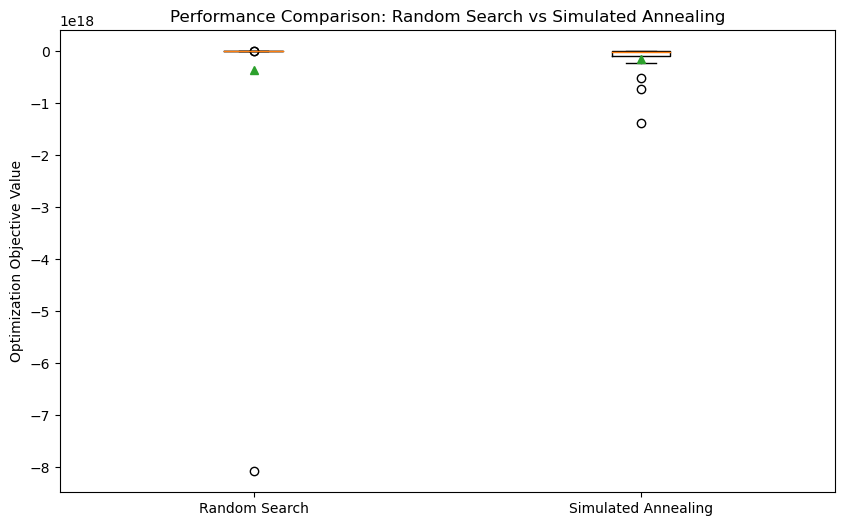

In [41]:
#import matplotlib.pyplot as plt

# Combine results for box plot
all_results = [best_values_rs, best_values_sa]
labels = ['Random Search', 'Simulated Annealing']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(all_results, labels=labels, showmeans=True)
plt.title('Performance Comparison: Random Search vs Simulated Annealing')
plt.ylabel('Optimization Objective Value')
plt.show()


<h1>result</h1>
Form that we can undestand which one is better depend on a nature of problem we need to solve, Based on the provided data and statistical analysis, the results suggest that, on average, Random serach is slightly better than simulated annealing after many reapting for this optimization problem to find minimum value. The variance simulated annealing indicates that Simulated Annealing's results are more consistent across different runs compared to Random Search with variance of 1.03631 to 2.8309827.
It's important to note that the specific interpretation may depend on the nature of the optimization problem.</p>

<h1>Note</h1>
<p><h1>Why we used t_test:</h1>In our case, since we are dealing with sample values obtained from optimization algorithms (Random Search and Simulated Annealing), and we are comparing means over 21 repetitions and to use Z-score we need large enough sampling 30 ore more, the t-test is a reasonable choice. It accounts for the uncertainty associated with estimating the standard deviation from our sample and is less sensitive to the distribution of the data.

If your sample size is very large and the data distribution is approximately normal, you might find that the results of a t-test and a z-test are similar. However, it's good practice to use the t-test when dealing with small to moderate sample sizes or when the population standard deviation is unknown.</p>

<html>
<body>

<iframe width="420" height="345" src="https://www.youtube.com/embed/tgbNymZ7vqY">
</iframe>

</body>
</html>

<html>
<body>

<iframe width="420" height="345" src="https://www.youtube.com/embed/tgbNymZ7vqY">
</iframe>

</body>
</html>

<iframe width="420" height="345" src="https://www.youtube.com/embed/tgbNymZ7vqY">
</iframe>
